<a href="https://colab.research.google.com/github/pformoso-deus-ai/Notebooks/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

## EDA process

### Data Overview

Size of the dataset: How many observations and features are there?
Type of data: Numeric, categorical, timestamps, etc.
Summary statistics: Mean, median, standard deviation, min, max, etc. for each column.
Missing values: Identify and address any missing values in the dataset.

In [ ]:
df = pd.read_csv('data/laser_process_dataset.csv', delimiter=";")
df.columns = ["P", "F", "V", "D", "W"]

In [ ]:
# 1. Size of the dataset:
print("Size of the dataset:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\n")

Size of the dataset:
Number of rows: 260
Number of columns: 5




In [ ]:
# 2. Type of data:
print("Data Types:")
print(df.dtypes)
print("\n")

Data Types:
power              int64
focus              int64
weld_velocity      int64
penetration      float64
weld_width       float64
dtype: object




In [ ]:
# 3. Summary statistics:
print("Summary Statistics:")
print(df.describe())
print("\n")

Summary Statistics:
             power       focus  weld_velocity  penetration  weld_width
count   260.000000  260.000000     260.000000   260.000000  260.000000
mean   4417.307692   -0.903846     155.423077     0.603731    1.028423
std     731.191748   14.020475      31.662644     0.254202    0.169394
min    3500.000000  -20.000000      80.000000     0.110000    0.560000
25%    4000.000000  -15.000000     130.000000     0.417500    0.930000
50%    4500.000000    0.000000     160.000000     0.600000    1.050000
75%    5000.000000   10.000000     180.000000     0.792500    1.150000
max    5500.000000   20.000000     220.000000     1.190000    1.400000




In [ ]:
# 4. Missing values:
print("Number of missing values in each column:")
print(df.isnull().sum())
print("\n")

# Percentage of missing values (optional)
print("Percentage of missing values in each column:")
print(df.isnull().mean() * 100)

Number of missing values in each column:
power            0
focus            0
weld_velocity    0
penetration      0
weld_width       0
dtype: int64


Percentage of missing values in each column:
power            0.0
focus            0.0
weld_velocity    0.0
penetration      0.0
weld_width       0.0
dtype: float64


## Univariate Analysis:
Histograms/Distributions for each variable:
* P (Laser Head Power)
* F (Focal Distance)
* V (Robotic Arm Velocity)
* D (Penetration Depth)
* W (Weld Width)

What does the Univariate Analysis tell us?
1. Distribution: By looking at the histogram, you can visually check the shape of the distribution. For instance, bell-shaped curves might indicate a normal distribution.

2. Central Tendency: The "center" or "middle" of the data. A peak in the histogram might show where most of the values lie.

3. Spread/Dispersion: How "spread out" the data is. A wider histogram might indicate higher variance.

4. Outliers: Values that lie far from the rest of the data. They might appear as bars isolated from the rest of the histogram.

5. Skewness: If the data is skewed to the left or right. A left-skewed distribution has a long left tail, and right-skewed distribution has a long right tail.

6. Presence of Multiple Modes: More than one peak in the histogram can indicate the presence of multiple groups or modes in the data.

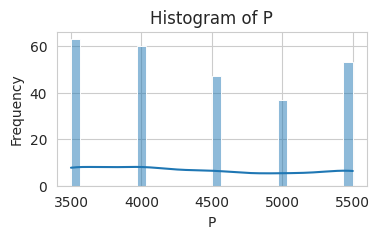

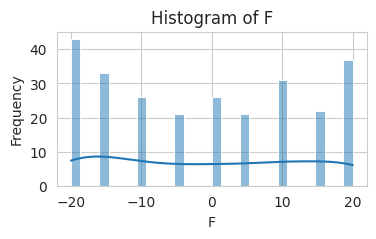

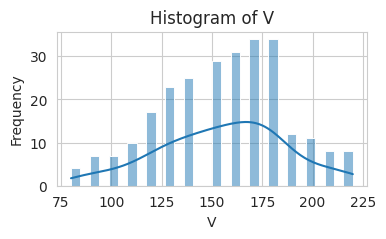

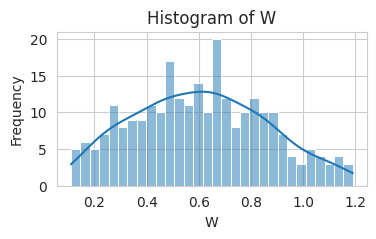

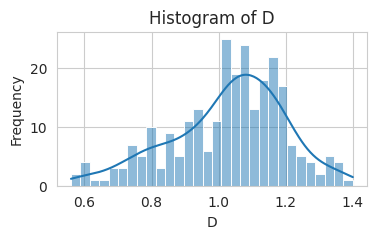

In [ ]:
sns.set_style("whitegrid")
columns = df.columns

# Plot histograms
for col in columns:
    plt.figure(figsize=(5, 2))
    sns.histplot(df[col], kde=True, bins=30)  # kde=True will also plot a Kernel Density Estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Bivariate Analysis
Explores the relationship between two variables. By examining relationships, we can understand how one variable changes in relation to another. In this context, we want to understand how the independent variables P,F,V relate to the dependent variables W,D.

Techniques for Bivariate Analysis:
Scatter plots: Visualize the relationship between two numerical variables.
Correlation coefficients: Quantify the linear relationship between two numerical variables.

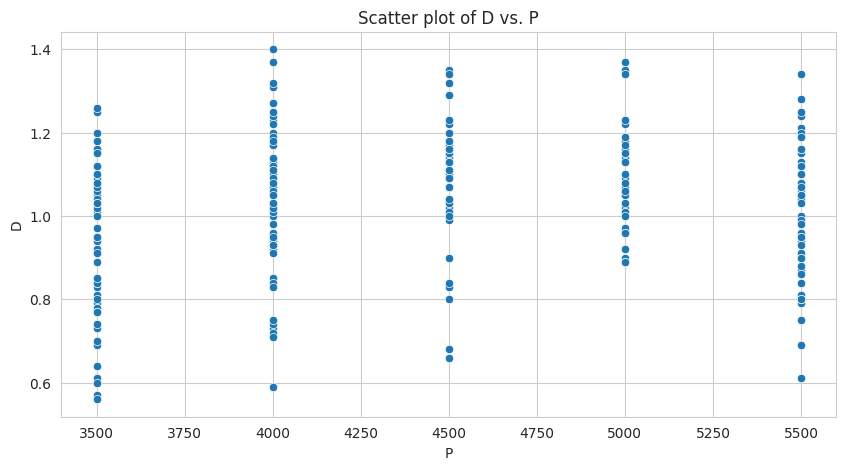

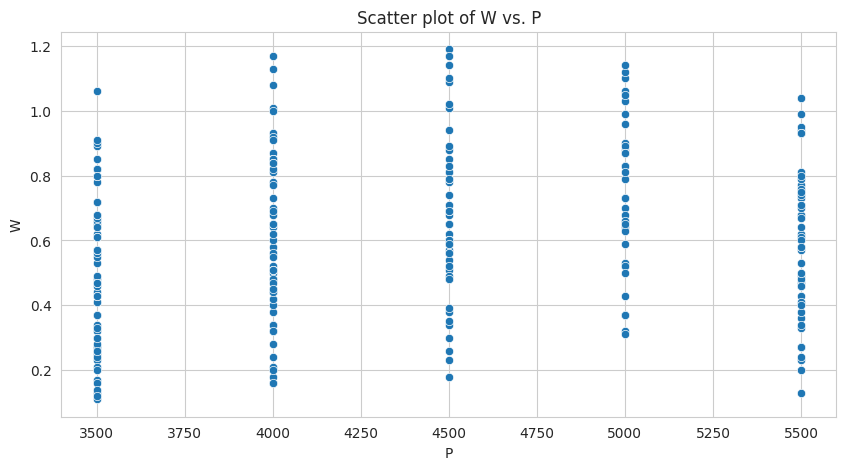

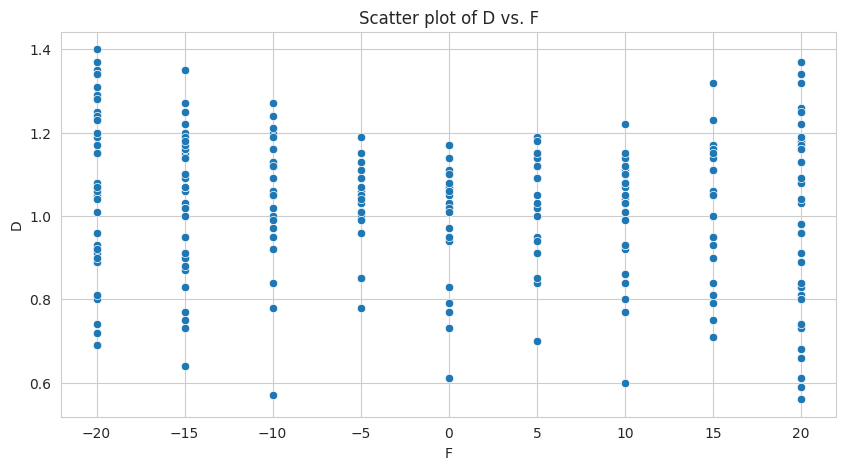

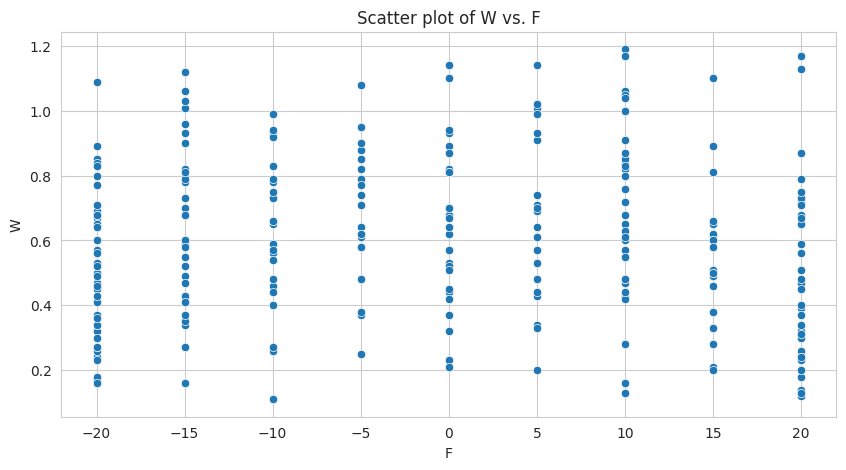

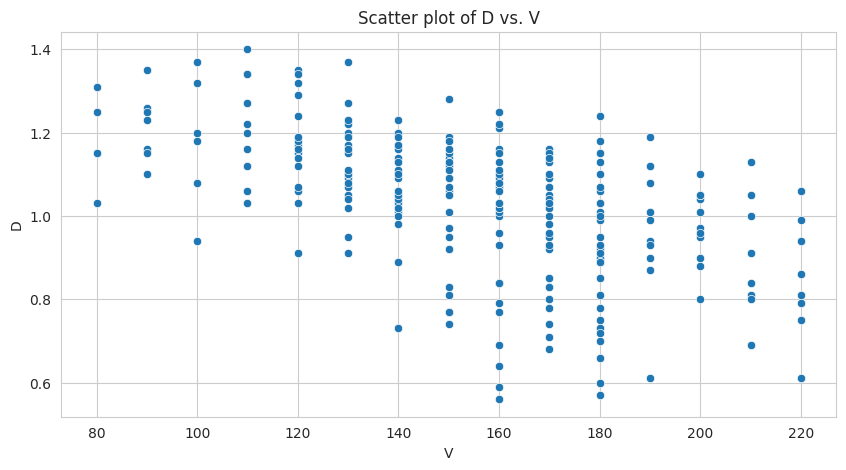

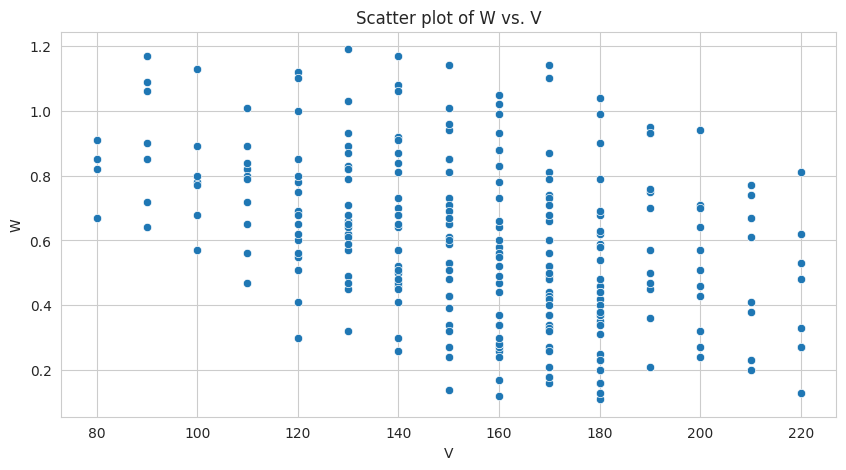

In [ ]:
# Set style for seaborn
sns.set_style("whitegrid")

# Independent variables
independent_vars = ['P', 'F', 'V']

# Dependent variables
dependent_vars = ['D', 'W']

# 1. Scatter plots
for ind_var in independent_vars:
    for dep_var in dependent_vars:
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=ind_var, y=dep_var)
        plt.title(f'Scatter plot of {dep_var} vs. {ind_var}')
        plt.xlabel(ind_var)
        plt.ylabel(dep_var)
        plt.show()

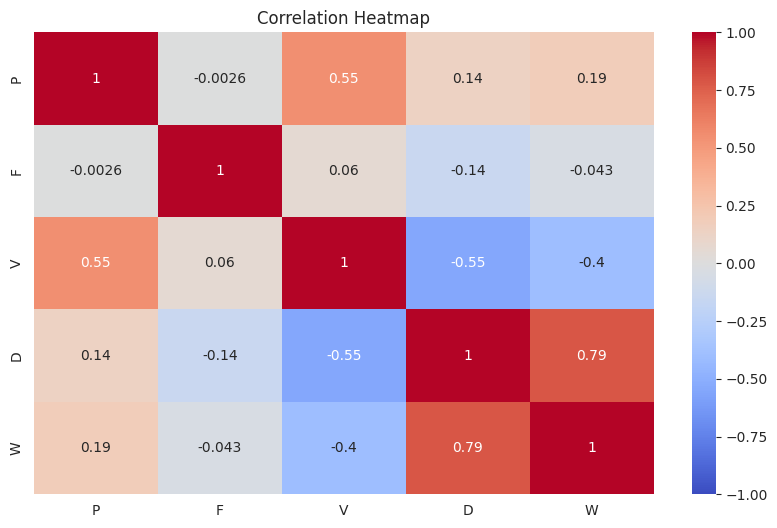

In [ ]:
# 2. Correlation matrix for the selected variables
selected_vars = independent_vars + dependent_vars
correlation_matrix = df[selected_vars].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Outliner detection with IQR

IQR method are as follows:

For each column, calculate its 1st quartile (Q1) and 3rd quartile (Q3).

Compute the IQR = Q3 - Q1.

Calculate the boundary for outliers as:
* Lower Boundary = Q1 - (1.5 * IQR)
* Upper Boundary = Q3 + (1.5 * IQR)

Anything below the Lower Boundary or above the Upper Boundary is considered an outlier.

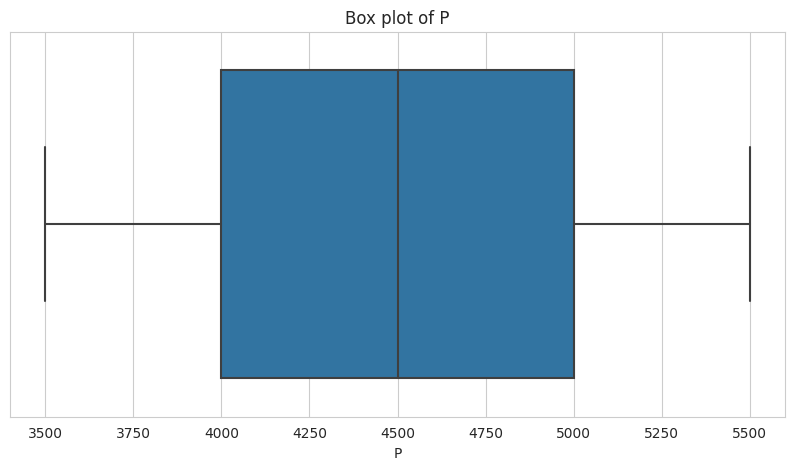

No outliers detected in P




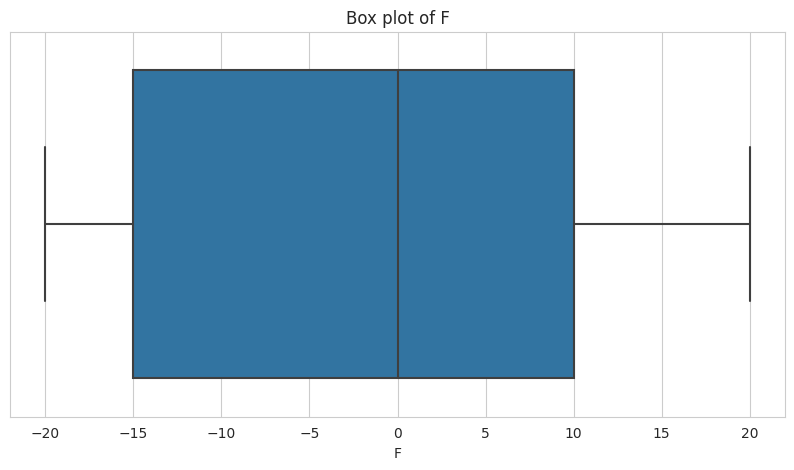

No outliers detected in F




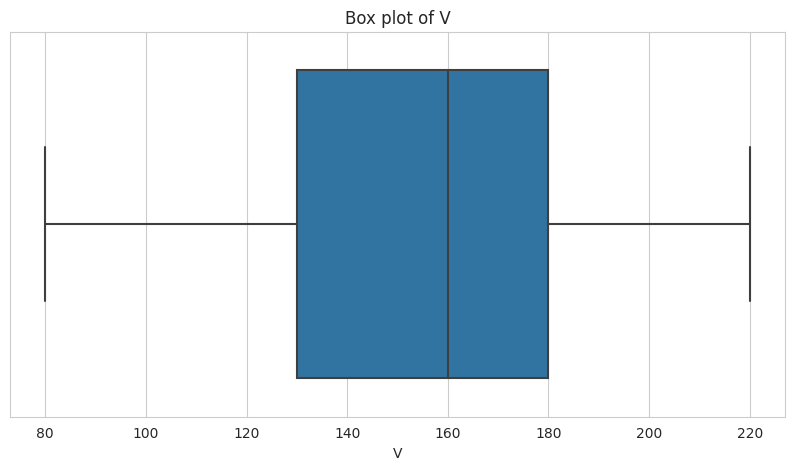

No outliers detected in V




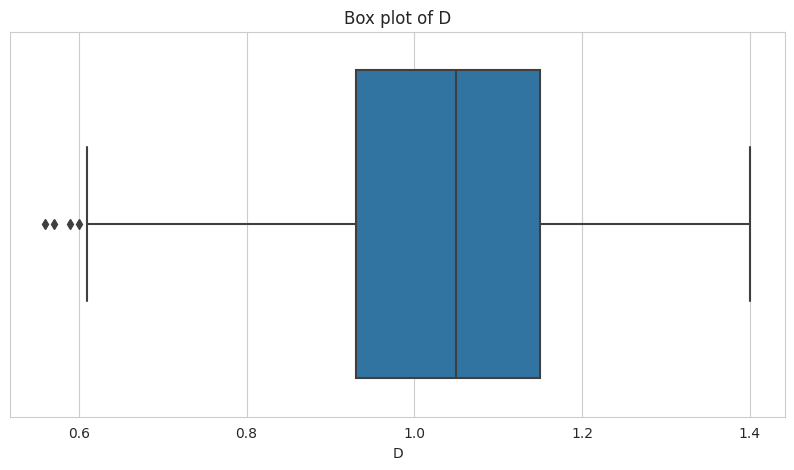

Number of outliers detected in D: 4
        D
54   0.57
177  0.60
229  0.56
237  0.59




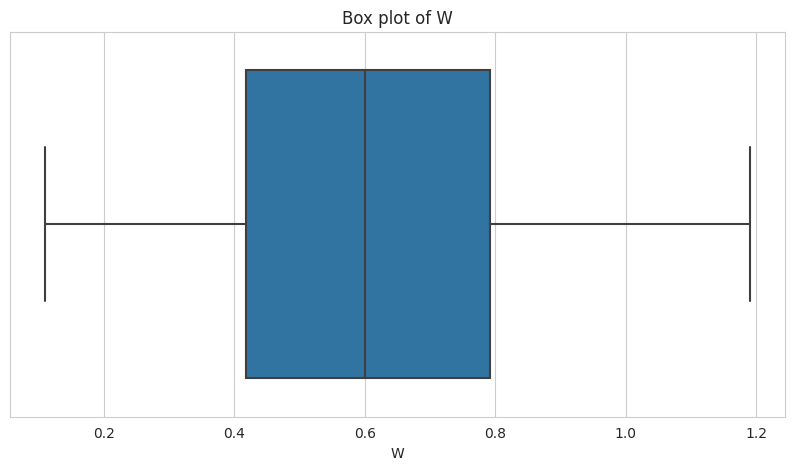

No outliers detected in W




In [ ]:
def detect_outliers(data, column_name):
    """
    Detect outliers using IQR method.
    """
    # Calculate Q1, Q2, and IQR
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Displaying box plots and detecting outliers for each column
columns = ['P', 'F', 'V', 'D', 'W']

for col in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

    # Detecting outliers using the defined function
    outliers_df = detect_outliers(df, col)
    if outliers_df.shape[0] > 0:
        print(f"Number of outliers detected in {col}: {outliers_df.shape[0]}")
        print(outliers_df[[col]])
    else:
        print(f"No outliers detected in {col}")
    print("\n")



## Cluster Analysis

K-means is one of the most popular clustering algorithms. For this demonstration, I'll use K-means clustering to group your data.

Steps for Cluster Analysis:
1. Data Preprocessing: Standardize the data since K-means is sensitive to the scale of the data.
2. Determine number of clusters (k): Use the Elbow Method to find the optimal number of clusters.
3. Apply K-means clustering.
4. Visualize the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

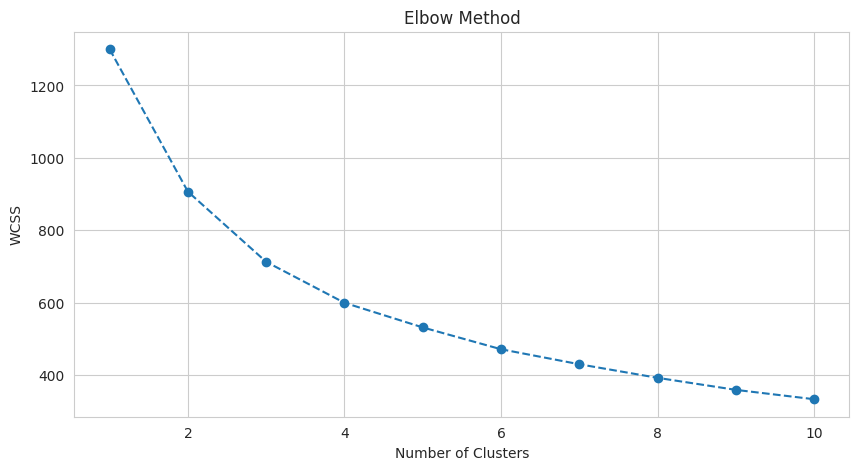

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


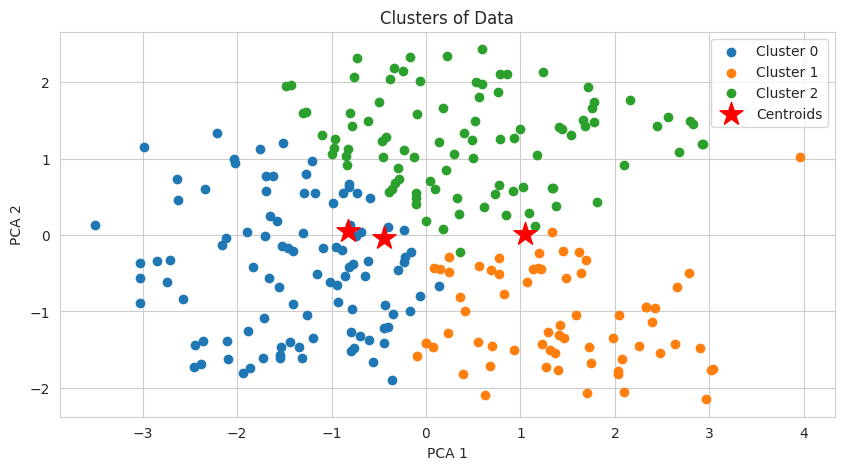

In [ ]:
# 1. Data Preprocessing: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2. Determine number of clusters (k) using Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
possible_clusters = range(1, 11)

for i in possible_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(possible_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 3. Apply K-means clustering (let's assume optimal clusters = 3 for demonstration)
optimal_clusters = 3  # Update this based on the Elbow Method visualization
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_data = kmeans.fit_predict(df_scaled)

# Add clusters to the original data for further analysis
df['Cluster'] = clustered_data

# 4. Visualize the clusters using PCA (for simplification to 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 5))
for i in range(optimal_clusters):
    plt.scatter(df_pca[clustered_data == i, 0], df_pca[clustered_data == i, 1], label=f"Cluster {i}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label="Centroids")
plt.title('Clusters of Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


## David Boulding Index

In [ ]:
# Data Preprocessing: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-means clustering (assuming optimal clusters = 3 for demonstration)
optimal_clusters = 4  # Update this based on your earlier analysis or intuition
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_data = kmeans.fit_predict(df_scaled)

# Compute Davies-Bouldin index
db_score = davies_bouldin_score(df_scaled, clustered_data)

print(f"Davies-Bouldin Index: {db_score:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 1.25


## PCA

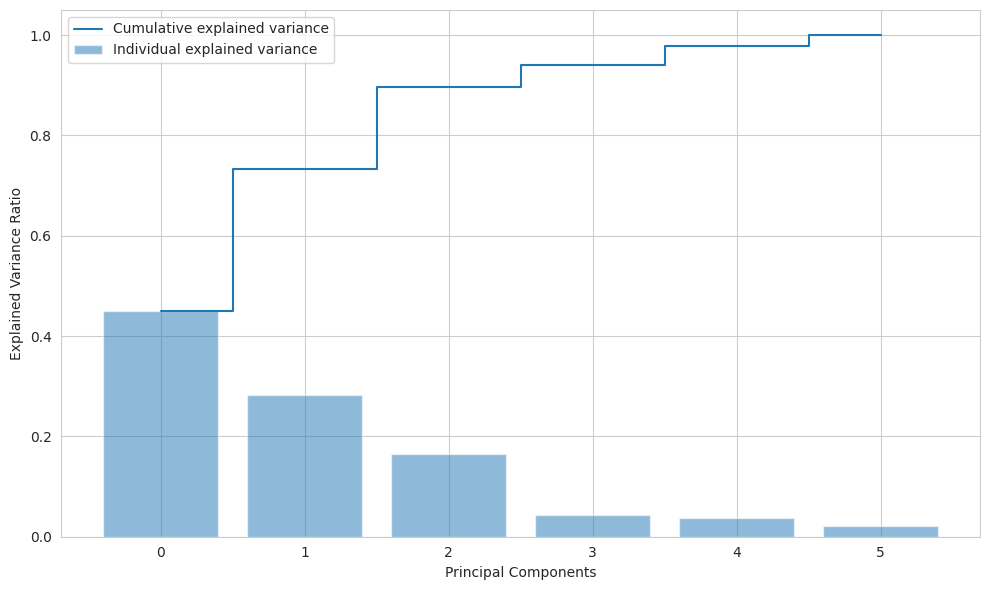

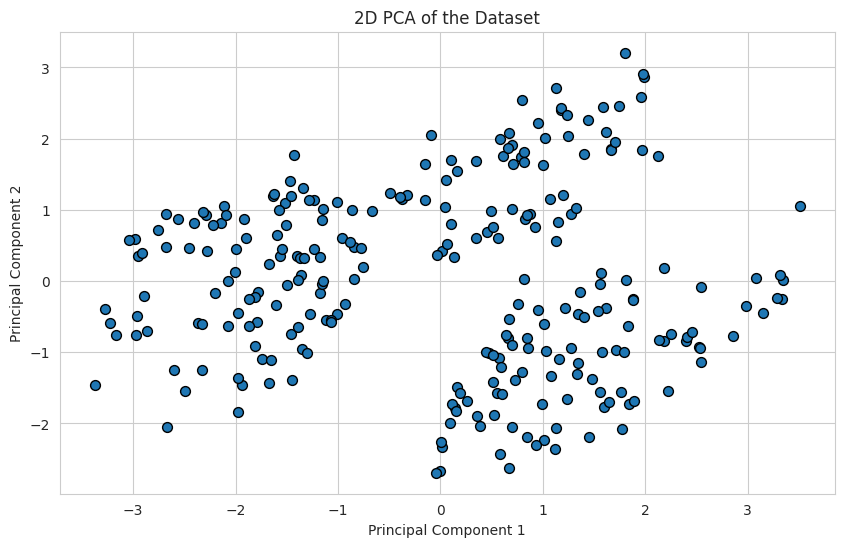

In [ ]:
# 1. Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2. Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# 3. Visualize Results
# Plotting the explained variance for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(explained_variance_ratio)), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 4. Transform Data (Optional, e.g., if you want to use first two PCs for visualization)
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

# Visualize the dataset in 2D (Optional)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Dataset')
plt.show()